<a href="https://colab.research.google.com/github/MeenTers/Project/blob/main/Test_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

# Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return loader

In [9]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

# Test Min(75%)

In [10]:
def get_dmg_F(eucli):
          if eucli[0] < 2.28:
              print('N')
          elif   2.28 <= eucli[0] <= 9.43:
              print('L')
          elif 9.43 < eucli[0] <= 13.38:
              print('M')
          elif eucli[0] > 13.38:
               print('H')

In [11]:
def get_dmg_L(eucli):
          if eucli[1] < 0.15:
              print('N')
          elif   0.15 <= eucli[1] <= 16.9:
              print('L')
          elif 16.9 < eucli[1] <= 23.11:
              print('M')
          elif eucli[1] > 23.11:
               print('H')

In [12]:
def get_dmg_B(eucli):
          if eucli[2] < 1.42:
              print('N')
          elif   1.42 <= eucli[2] <= 2.61:
              print('L')
          elif 2.61 < eucli[2] <= 9.4:
              print('M')
          elif eucli[2] > 9.4:
               print('H')

In [13]:
def get_dmg_R(eucli):
          if eucli[3] < 0.14:
              print('N')
          elif   0.14 <= eucli[3] <= 13.21:
              print('L')
          elif 13.21 < eucli[3] <= 24.6:
              print('M')
          elif eucli[3] > 24.6:
               print('H')

In [14]:
car1 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID01/base')
dmg1 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT01/ldmg/ldmg')

In [15]:
id1b = get_features(vgg,car1)
id1v = get_features(vgg,dmg1)

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


In [16]:
ldmg = get_euclidean(id1b,id1v)
ldmg 

[10.163106918334961,
 13.784590721130371,
 11.248163223266602,
 0.7433202266693115]

In [17]:
get_dmg_F(ldmg)
get_dmg_L(ldmg)
get_dmg_B(ldmg)
get_dmg_R(ldmg)

M
L
H
L


In [31]:
car5 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID02/base')
dmg5 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT02/ldamage')

In [32]:
id5b = get_features(vgg,car5)
id5v = get_features(vgg,dmg5)

100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


In [34]:
ldmg2 = get_euclidean(id5b,id5v)
ldmg2

[15.572575569152832, 2.2729170322418213, 5.5173821449279785, 2.493569850921631]

In [35]:
get_dmg_F(ldmg2)
get_dmg_L(ldmg2)
get_dmg_B(ldmg2)
get_dmg_R(ldmg2)

H
L
M
L


In [18]:
car2 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID01/base')
dmg2 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT01/dmg/dmg')

In [19]:
id2b = get_features(vgg,car2)
id2v = get_features(vgg,dmg2)

100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


In [20]:
dmg = get_euclidean(id2b,id2v)
dmg 

[12.1842622756958, 24.313583374023438, 10.790995597839355, 14.052972793579102]

In [21]:
get_dmg_F(dmg)
get_dmg_L(dmg)
get_dmg_B(dmg)
get_dmg_R(dmg)

M
H
H
M


In [36]:
car6 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID02/base')
dmg6 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT02/damage')

In [37]:
id6b = get_features(vgg,car6)
id6v = get_features(vgg,dmg6)

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


In [38]:
dmg2 = get_euclidean(id6b,id6v)
dmg2 

[28.40903663635254, 43.57123565673828, 20.138887405395508, 32.70841598510742]

In [39]:
get_dmg_F(dmg)
get_dmg_L(dmg)
get_dmg_B(dmg)
get_dmg_R(dmg)

M
H
H
M


In [22]:
car3 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID01/base')
dmg3 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT01/mdmg/mdmg')

In [23]:
id3b = get_features(vgg,car3)
id3v = get_features(vgg,dmg3)

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


In [24]:
mdmg = get_euclidean(id3b,id3v)
mdmg 

[44.37136459350586, 35.648563385009766, 28.415727615356445, 38.51735305786133]

In [25]:
get_dmg_F(mdmg)
get_dmg_L(mdmg)
get_dmg_B(mdmg)
get_dmg_R(mdmg)

H
H
H
H


In [40]:
car7 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID02/base')
dmg7 = get_dataset(r'/content/drive/MyDrive/test_acc/dmg/IDT02/mdamage')

In [41]:
id7b = get_features(vgg,car7)
id7v = get_features(vgg,dmg7)

100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


In [42]:
mdmg2 = get_euclidean(id7b,id7v)
mdmg2 

[62.39018630981445, 61.76888656616211, 39.95536422729492, 50.05046081542969]

In [43]:
get_dmg_F(mdmg2)
get_dmg_L(mdmg2)
get_dmg_B(mdmg2)
get_dmg_R(mdmg2)

H
H
H
H


In [26]:
car4 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID01/base')
dmg4 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID01/base')

In [27]:
id4b = get_features(vgg,car4)
id4v = get_features(vgg,dmg4)

100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


In [29]:
nodmg = get_euclidean(id4b,id4v)
nodmg 

[0.0, 0.0, 0.0, 0.0]

In [30]:
get_dmg_F(nodmg)
get_dmg_L(nodmg)
get_dmg_B(nodmg)
get_dmg_R(nodmg)

N
N
N
N


In [44]:
car8 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID02/base')
dmg8 = get_dataset(r'/content/drive/MyDrive/test_acc/base/ID02/base')

In [45]:
id8b = get_features(vgg,car8)
id8v = get_features(vgg,dmg8)

100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


In [46]:
nodmg2 = get_euclidean(id8b,id8v)
nodmg2 

[0.0, 0.0, 0.0, 0.0]

In [47]:
get_dmg_F(nodmg2)
get_dmg_L(nodmg2)
get_dmg_B(nodmg2)
get_dmg_R(nodmg2)

N
N
N
N


# Test ACC MAX(46.88%)

In [48]:
def get_dmg_F(eucli):
          if eucli[0] < 18.02:
              print('N')
          elif   18.02 <= eucli[0] <= 36.01:
              print('L')
          elif 36.01 < eucli[0] <= 57.25:
              print('M')
          elif eucli[0] > 57.25:
               print('H')

In [49]:
def get_dmg_L(eucli):
          if eucli[0] < 2.23:
              print('N')
          elif   2.23 <= eucli[0] <= 27.39:
              print('L')
          elif 27.39 < eucli[0] <= 53.79:
              print('M')
          elif eucli[0] > 53.79:
               print('H')

In [50]:
def get_dmg_B(eucli):
          if eucli[0] < 27.08:
              print('N')
          elif   27.08 <= eucli[0] <= 33.32:
              print('L')
          elif 33.32 < eucli[0] <= 79.67:
              print('M')
          elif eucli[0] > 79.67:
               print('H')

In [51]:
def get_dmg_R(eucli):
          if eucli[0] < 12.01:
              print('N')
          elif   2.28 <= eucli[0] <= 45.92:
              print('L')
          elif 45.92 < eucli[0] <= 49.97:
              print('M')
          elif eucli[0] > 49.97:
               print('H')

In [53]:
get_dmg_F(ldmg)
get_dmg_L(ldmg)
get_dmg_B(ldmg)
get_dmg_R(ldmg)

N
L
N
N


In [54]:
get_dmg_F(ldmg2)
get_dmg_L(ldmg2)
get_dmg_B(ldmg2)
get_dmg_R(ldmg2)

N
L
N
L


In [55]:
get_dmg_F(dmg)
get_dmg_L(dmg)
get_dmg_B(dmg)
get_dmg_R(dmg)

N
L
N
L


In [56]:
get_dmg_F(dmg2)
get_dmg_L(dmg2)
get_dmg_B(dmg2)
get_dmg_R(dmg2)

L
M
L
L


In [57]:
get_dmg_F(mdmg)
get_dmg_L(mdmg)
get_dmg_B(mdmg)
get_dmg_R(mdmg)

M
M
M
L


In [58]:
get_dmg_F(mdmg2)
get_dmg_L(mdmg2)
get_dmg_B(mdmg2)
get_dmg_R(mdmg2)

H
H
M
H


In [59]:
get_dmg_F(nodmg)
get_dmg_L(nodmg)
get_dmg_B(nodmg)
get_dmg_R(nodmg)

N
N
N
N


In [60]:
get_dmg_F(nodmg2)
get_dmg_L(nodmg2)
get_dmg_B(nodmg2)
get_dmg_R(nodmg2)

N
N
N
N


# Test ACC AVG(78.13%)

In [61]:
def get_dmg_F(eucli):
          if eucli[0] < 9.6:
              print('N')
          elif   9.6 <= eucli[0] <= 21.92:
              print('L')
          elif 21.92 < eucli[0] <= 44.75:
              print('M')
          elif eucli[0] > 44.75:
               print('H')

In [62]:
def get_dmg_L(eucli):
          if eucli[0] < 1.08:
              print('N')
          elif   1.08 <= eucli[0] <= 24.24:
              print('L')
          elif 24.24 < eucli[0] <= 35.84:
              print('M')
          elif eucli[0] > 35.84:
               print('H')

In [63]:
def get_dmg_B(eucli):
          if eucli[0] < 8.92:
              print('N')
          elif   8.92 <= eucli[0] <= 13.39:
              print('L')
          elif 13.39 < eucli[0] <= 49.03:
              print('M')
          elif eucli[0] > 49.03:
               print('H')

In [64]:
def get_dmg_R(eucli):
          if eucli[0] < 4.48:
              print('N')
          elif   4.48 <= eucli[0] <= 24.76:
              print('L')
          elif 24.76 < eucli[0] <= 33.37:
              print('M')
          elif eucli[0] > 33.37:
               print('H')

In [65]:
get_dmg_F(ldmg)
get_dmg_L(ldmg)
get_dmg_B(ldmg)
get_dmg_R(ldmg)

L
L
L
L


In [66]:
get_dmg_F(ldmg2)
get_dmg_L(ldmg2)
get_dmg_B(ldmg2)
get_dmg_R(ldmg2)

L
L
M
L


In [67]:
get_dmg_F(dmg)
get_dmg_L(dmg)
get_dmg_B(dmg)
get_dmg_R(dmg)

L
L
L
L


In [68]:
get_dmg_F(dmg2)
get_dmg_L(dmg2)
get_dmg_B(dmg2)
get_dmg_R(dmg2)

M
M
M
M


In [69]:
get_dmg_F(mdmg)
get_dmg_L(mdmg)
get_dmg_B(mdmg)
get_dmg_R(mdmg)

M
H
M
H


In [70]:
get_dmg_F(mdmg2)
get_dmg_L(mdmg2)
get_dmg_B(mdmg2)
get_dmg_R(mdmg2)

H
H
H
H


In [71]:
get_dmg_F(nodmg)
get_dmg_L(nodmg)
get_dmg_B(nodmg)
get_dmg_R(nodmg)

N
N
N
N


In [72]:
get_dmg_F(nodmg2)
get_dmg_L(nodmg2)
get_dmg_B(nodmg2)
get_dmg_R(nodmg2)

N
N
N
N


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
# Predicted values
y_pred = [0,0,0, 0,1,2,1,2,2,2,1,2,2,3,3,2]
# Actual values
y_act = [0, 0, 0, 0,1,1,1,1,2,2,2,2,3,3,3,3]

In [ ]:
from torchvision.transforms.functional import normalize
confusion_matrix(y_act, y_pred,normalize='true')

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.  , 0.5 , 0.5 ]])

In [ ]:
y_pred = [1,1,1,1]
# Actual values
y_act = [1,1,1,1]

In [ ]:
cf_matrix = confusion_matrix(y_act, y_pred,normalize='true')

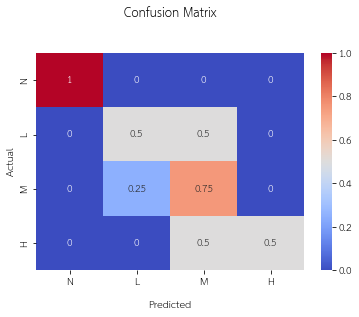

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['N','L','M','H'])
ax.yaxis.set_ticklabels(['N','L','M','H'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np